# Insertion Sort VS Merge Sort
In this notebook, we will compare the performance of two sorting algorithms: **Insertion Sort** and **Merge Sort**. We will cover the implementation of these two algorithms, after which they will be tested on random arrays of different sizes to analyze and compare execution times. The results will then be visualized graphically using matplotlib.

#### Insertion Sort

* **Description**: It is a *stable* algorithm (it maintains the relative order of equal elements), simple and intuitive, often used on small datasets. To understand how it works, think of sorting playing cards: you take one card at a time and insert it into the correct position by comparing it with every card in the previously sorted deck.

* **How it works**: Initially, the first element is considered already sorted (if there is only one element, the array is sorted). Then, the next element is taken and compared with the first: if the second element is smaller, they are swapped. The process is iterative: move to the next element and compare it with the previously sorted elements, placing it in the correct position. Continue this way until the array is fully sorted.

* **Time Complexity**: In the *best* case (array already sorted) it is $O(n)$; in the *average* and *worst* cases, it is $O(n^2)$.
* **Space Complexity**: $O(1)$ as it operates *in-place*.



#### Merge Sort

* **Description**: This is also a stable algorithm, but it is based on the *Divide* and *Conquer* paradigm. It is much more efficient than Insertion Sort and is primarily used on large amounts of data

* **How it works**:

    - Recursively divides the array in half until obtaining many sub-arrays of length 1.

    - Merges the sub-arrays while maintaining order until a single fully sorted array is obtained.

* **Time Complexity**: In all cases $O(n\space log\space n)$.

* **Space Complexity**: $O(n)$ as it uses auxiliary space for merging.

### Algorithm Implementation

Regarding the implementation, we will use several libraries: [random](https://docs.python.org/3/library/random.html), [time](https://docs.python.org/3/library/time.html), [matplotlib](https://matplotlib.org/stable/index.html), [pandas](https://pandas.pydata.org/docs/), [tracemalloc](https://docs.python.org/3.14/library/tracemalloc.html).


In [1]:
import math # to represent 'infinity'
import random # for random data generation
import time # for measuring execution times
import matplotlib.pyplot as plt # for plots
import pandas as pd # per tables
import tracemalloc # to track memory usage

In particular, the following functions will be used:
* *random.randint(a, b)* returns an integer $N$ such that $a\space \le \space N \space \le \space b$
* *time.perf_counter()* returns the value (in fractional seconds) of a performance counter. The reference point is undefined, so only the difference between the results of two calls is valid.

#### Insertion Sort Implementation

In [2]:
def insertionSort(A): 
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i -= 1
        A[i+1] = key
    return A

#### Merge Sort Implementation

In [3]:
def mergeSort(A, start, end):
    if start < end:
        mid = (start + end) // 2
        mergeSort(A, start, mid)
        mergeSort(A, mid + 1, end)
        merge(A, start, mid, end)
    return A

def merge(A, start, mid, end):
    n = mid - start + 1
    m = end - mid
    # create arrays left[1, ___ , n+1] and right[1, ___ , m+1]
    left = []
    right = []
    for i in range(n):
        left.append(A[start + i])
    for j in range(m):
        right.append(A[mid + 1 + j])
    left.append(math.inf)
    right.append(math.inf)
    i = j = 0
    for k in range(start, end + 1):
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1

### Data generation and execution time measurement

In [11]:
def generateSizes():
    sizes = []
    # create sizes from 10 to 500 with step 50
    for i in range(10, 550, 50):
        sizes.append(i)

    # from 500 to 2000 with step 250
    for i in range(750, 1250, 250):
        sizes.append(i)

    # from 2000 to 10000 with step 1000
    for i in range(3000, 11000, 1000):
        sizes.append(i)
    return sizes

def generateData(sizes):
    data = {
        "Best Case": {},
        "Average Case": {},
        "Worst Case": {}
    }

    for size in sizes:
        data["Best Case"][size] = []
        data["Average Case"][size] = []
        data["Worst Case"][size] = []

        for i in range(0, size):
            data["Best Case"][size].append(i) # best case

        for _ in range(size):
            data["Average Case"][size].append(random.randint(0, 10000)) # average case
        
        for i in range(size, 0, -1):
            data["Worst Case"][size].append(i) # worst case
    
    return data

def runTests(data, insertionTimes, mergeTimes, sizes, reps = 10):
    for size in sizes:
        # insertion sort testing

        testArray = data["Best Case"][size].copy()
        times = []
        for _ in range(reps):
            start = time.perf_counter()
            insertionSort(testArray)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        insertionTimes["Best Case"].append(averageTime)

        times.clear()
        testArray = data["Average Case"][size].copy()
        for _ in range(reps):
            start = time.perf_counter()
            insertionSort(testArray)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        insertionTimes["Average Case"].append(averageTime)

        times.clear()
        testArray = data["Worst Case"][size].copy()
        for _ in range(reps):
            start = time.perf_counter()
            insertionSort(testArray)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        insertionTimes["Worst Case"].append(averageTime)

        # merge sort testing

        times.clear()
        testArray = data["Best Case"][size].copy()
        for _ in range(reps):
            start = time.perf_counter()
            mergeSort(testArray, 0, len(testArray) - 1)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        mergeTimes["Best Case"].append(averageTime)

        times.clear()
        testArray = data["Average Case"][size].copy()
        for _ in range(reps):
            start = time.perf_counter()
            mergeSort(testArray, 0, len(testArray) - 1)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        mergeTimes["Average Case"].append(averageTime)

        times.clear()
        testArray = data["Worst Case"][size].copy()
        for _ in range(reps):
            start = time.perf_counter()
            mergeSort(testArray, 0, len(testArray) - 1)
            end = time.perf_counter()
            times.append(end - start)
        averageTime = sum(times) / len(times)
        mergeTimes["Worst Case"].append(averageTime)




sizes = generateSizes()
data = generateData(sizes)
reps = 10
print(str(sizes))

insertionTimes = {
    "Best Case": [],
    "Average Case": [],
    "Worst Case": []
}
mergeTimes = {
    "Best Case": [],
    "Average Case": [],
    "Worst Case": []
}

runTests(data, insertionTimes, mergeTimes, sizes, reps)


[10, 60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 750, 1000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


### Visualizzazione grafica e tabulare

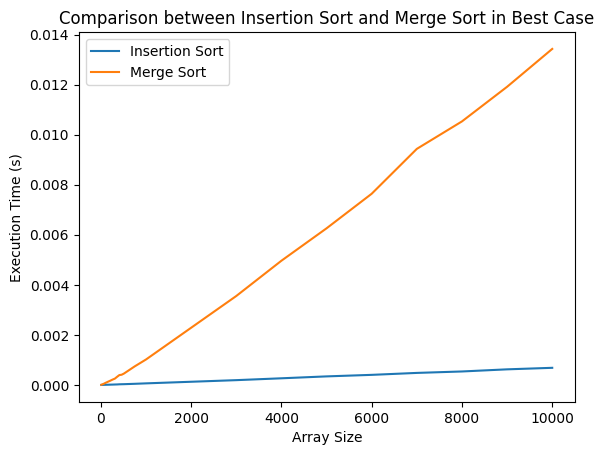

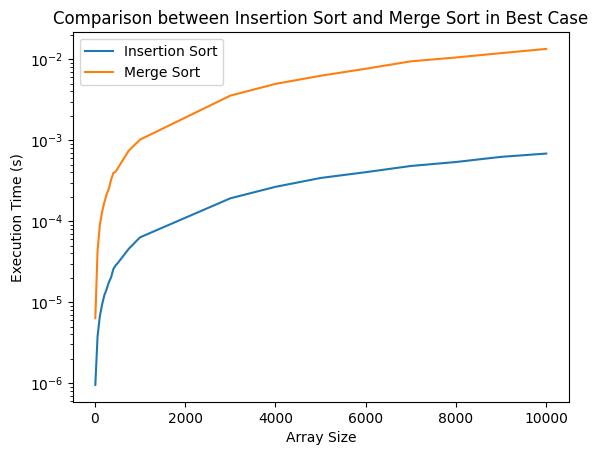

In [12]:
def plotGraph(case, sizes, insertionTimes, mergeTimes, logScale = False):
    plt.figure()
    plt.title("Comparison between Insertion Sort and Merge Sort in " + case)
    plt.plot(sizes, insertionTimes[case], label = "Insertion Sort")
    plt.plot(sizes, mergeTimes[case], label = "Merge Sort")
    plt.xlabel("Array Size")
    plt.ylabel("Execution Time (s)")
    if logScale:
        plt.yscale("log")
    plt.legend()
    plt.show()

plotGraph("Best Case", sizes, insertionTimes, mergeTimes)
plotGraph("Best Case", sizes, insertionTimes, mergeTimes, logScale = True)

# plotGraph("Worst Case", sizes, insertionTimes, mergeTimes)
# plotGraph("Worst Case", sizes, insertionTimes, mergeTimes, logScale = True)


Let's check the results of the tests performed in the best case (array already sorted) in tabular form as well:

In [13]:
ratios = [insertionTime/mergeTime for insertionTime, mergeTime in zip(insertionTimes["Best Case"], mergeTimes["Best Case"])] # per ottenere i rapporti tra i tempi

df = pd.DataFrame({
    "Array Size (n)": sizes,
    "Insertion Sort Time (s)": insertionTimes["Best Case"],
    "Merge Sort Time (s)": mergeTimes["Best Case"],
    "Insertion/Merge Ratio": ratios
})

df_styled = (
    df.style
    .hide(axis="index") # nasconde gli indici
    .format({
        "Insertion/Merge Ratio": "{:.0%}"  # rapporti in percentuale
    })
    .set_properties(**{'text-align': 'center'})  # centra
)

display(df_styled)

Array Size (n),Insertion Sort Time (s),Merge Sort Time (s),Insertion/Merge Ratio
10,0.000001,0.000006,15%
60,0.000004,0.000044,9%
110,0.000007,0.000089,8%
160,0.000009,0.000131,7%
210,0.000012,0.000171,7%
260,0.000014,0.000214,7%
310,0.000018,0.000252,7%
360,0.000020,0.000326,6%
410,0.000026,0.000395,7%
460,0.000028,0.000408,7%


Therefore, regarding the best case, we have that *Insertion* Sort iterates through the array making one comparison for each element without performing swaps; indeed, the curve grows linearly: we have $O(n)$.

*Merge Sort*, on the other hand, is always $O(n\space log\space n)$ because even with pre-sorted data, the algorithm follows the *divide and conquer* paradigm, thus splitting into sub-arrays and then merging them. In fact, it can be noted that its curve increases faster than *Insertion Sort* as the number of elements increases.

It can be concluded that in the best case, Insertion Sort is faster, and the Insertion/Merge ratio tends to decrease as $n$ increases (decreases as $\frac{1}{\log\space n}$).


Now let's look at the average case:

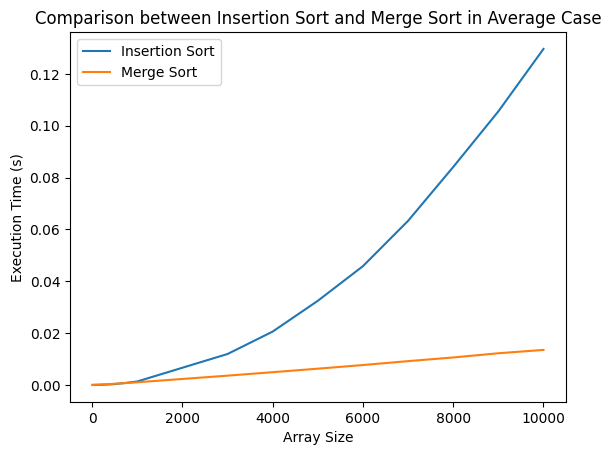

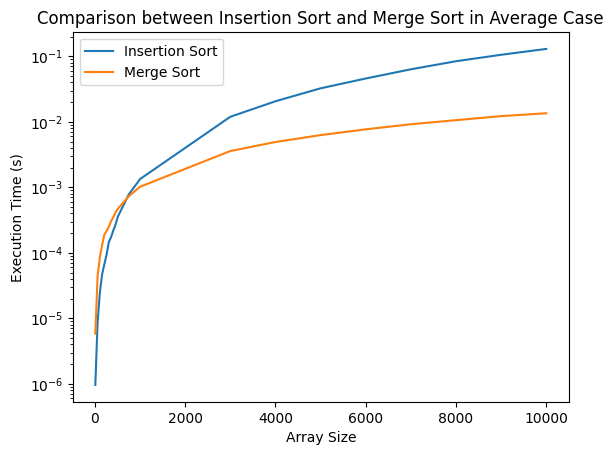

Array Size (n),Insertion Sort Time (s),Merge Sort Time (s),Insertion/Merge Ratio
10,0.000001,0.000006,17%
60,0.000009,0.000044,20%
110,0.000025,0.000085,29%
160,0.000047,0.000131,36%
210,0.000067,0.000190,35%
260,0.000094,0.000216,44%
310,0.000147,0.000251,58%
360,0.000174,0.000305,57%
410,0.000221,0.000352,63%
460,0.000273,0.000418,65%


In [14]:
plotGraph("Average Case", sizes, insertionTimes, mergeTimes)
plotGraph("Average Case", sizes, insertionTimes, mergeTimes, logScale = True)


ratios = [insertionTime/mergeTime for insertionTime, mergeTime in zip(insertionTimes["Average Case"], mergeTimes["Average Case"])]

df = pd.DataFrame({
    "Array Size (n)": sizes,
    "Insertion Sort Time (s)": insertionTimes["Average Case"],
    "Merge Sort Time (s)": mergeTimes["Average Case"],
    "Insertion/Merge Ratio": ratios
})

df_styled = (
    df.style.hide(axis="index") # nasconde gli indici
    .format({
        "Insertion/Merge Ratio": "{:.0%}"  # rapporti in percentuale
    })
)

display(df_styled)


In the average case, the theoretical hypotheses are confirmed again. From the table, *Insertion Sort* times grow quadratically ($O(n^2)$), while *Merge Sort* maintains its $O(n\space log\space n)$ behavior.

Graphically, the same can be observed: initially, the difference is subtle, but with an element quantity in the order of hundreds, the gap becomes evident.

Note: in the linear scale graph, it might seem that *Merge Sort* grows almost flat, contrary to how $n\space log\space n$ grows, but this is simply because the *Merge Sort* times are so small compared to *Insertion Sort* that its curve appears flattened.

Infine vediamo il caso peggiore:

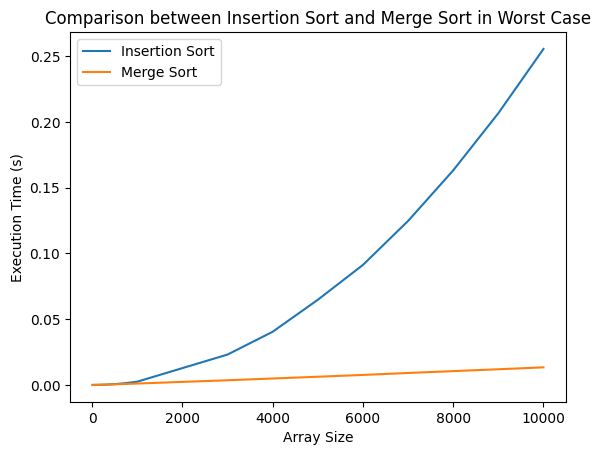

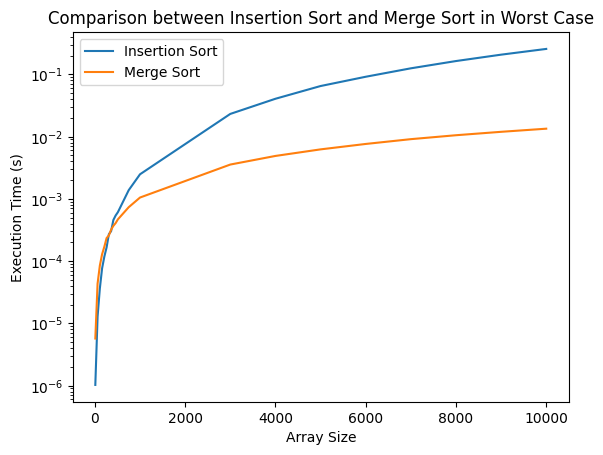

Array Size (n),Insertion Sort Time (s),Merge Sort Time (s),Insertion/Merge Ratio
10,0.000001,0.000006,18%
60,0.000013,0.000043,30%
110,0.000036,0.000084,43%
160,0.000076,0.000129,59%
210,0.000118,0.000170,69%
260,0.000166,0.000234,71%
310,0.000270,0.000258,105%
360,0.000302,0.000320,94%
410,0.000457,0.000368,124%
460,0.000540,0.000407,132%


In [15]:
plotGraph("Worst Case", sizes, insertionTimes, mergeTimes)
plotGraph("Worst Case", sizes, insertionTimes, mergeTimes, logScale = True)


ratios = [insertionTime/mergeTime for insertionTime, mergeTime in zip(insertionTimes["Worst Case"], mergeTimes["Worst Case"])]

df = pd.DataFrame({
    "Array Size (n)": sizes,
    "Insertion Sort Time (s)": insertionTimes["Worst Case"],
    "Merge Sort Time (s)": mergeTimes["Worst Case"],
    "Insertion/Merge Ratio": ratios
})

df_styled = (
    df.style.hide(axis="index") # nasconde gli indici
    .format({
        "Insertion/Merge Ratio": "{:.0%}"  # rapporti in percentuale
    })
)

display(df_styled)

In the worst case, we see that *Insertion Sort* presents the highest execution times compared to previous scenarios. This happens because, with arrays in reverse order, it must perform the maximum possible number of comparisons to sort the sequence, fully showing the complexity $O(n^2)$.

*Merge Sort*, once again, does not change its behavior ($O(n\space log\space n)$) because it divides the arrays regardless of the initial sequence.

Furthermore, the table shows how *Insertion Sort* becomes impractical with a large amount of data, while Merge Sort performs almost consistently and proves very efficient.

### Allocated Memory

When discussing algorithms, it is very important to consider their space complexity. Some algorithms, like Counting Sort, have a time complexity of $O(n)$, making them very efficient in execution times, but they are only practicable with an adequate dataset, as they must allocate an array with as many elements as the maximum range of the data being worked on.

Therefore, in this section, we will practically test the theoretical hypotheses regarding memory allocation described at the beginning of the project.

In [16]:
def measureMemory(func, data, reps = 10):
    memory = []
    for _ in range(reps):
        tracemalloc.start()
        func(data)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        memory.append(peak)
    
    return sum(memory) / len(memory)

    return peak/1024 # in KB

`tracemalloc.get_traced_memory()` returns two values: the current memory used and the peak memory reached during execution. Clearly, we are interested in the maximum peak.

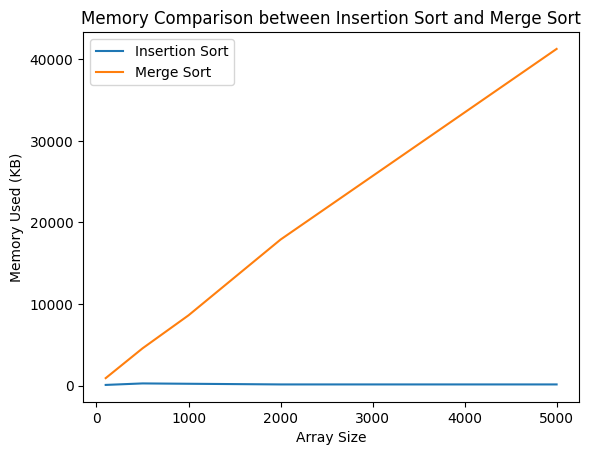

Array Size (n),Insertion Sort Memory (KB),Merge Sort Memory (KB),Insertion/Merge Ratio
100,88.000000,920.000000,10%
500,271.600000,4566.700000,6%
1000,229.700000,8616.000000,3%
2000,148.000000,17896.000000,1%
5000,148.000000,41256.000000,0%


In [17]:
mergeMemory = []
insertionMemory = []
sizes = [100, 500, 1000, 2000, 5000,]
for size in sizes:
    testArray = []
    for _ in range(size):
        testArray.append(random.randint(0, 10000))
    insertionMemory.append(measureMemory(insertionSort, testArray.copy(), reps))
    mergeMemory.append(measureMemory(lambda a: mergeSort(a, 0, len(a)-1), testArray.copy(), reps))


plt.figure()
plt.title("Memory Comparison between Insertion Sort and Merge Sort")
plt.plot(sizes, insertionMemory, label = "Insertion Sort")
plt.plot(sizes, mergeMemory, label = "Merge Sort")
plt.xlabel("Array Size")
plt.ylabel("Memory Used (KB)")
plt.legend()
plt.show()

ratios = [ti/tc for ti, tc in zip(insertionMemory, mergeMemory)]

df = pd.DataFrame({
    "Array Size (n)": sizes,
    "Insertion Sort Memory (KB)": insertionMemory,
    "Merge Sort Memory (KB)": mergeMemory,
    "Insertion/Merge Ratio": ratios
})

dfStyled = (
    df.style.hide(axis="index") # nasconde gli indici
    .format({
        "Insertion/Merge Ratio": "{:.0%}"  # rapporti in percentuale
    })
)

display(dfStyled)



- As can be seen from the graph, *Insertion Sort* allocation has a constant trend, thus confirming the space complexity $O(1)$.

- Conversely, *Merge Sort* has a linear trend, in line with theoretical hypotheses ($O(n)$).

# Conclusions
From the experimental analysis conducted, we can state that the results are consistent with the theoretical hypotheses.

From the graphs and tables, it emerges that *Insertion Sort* is advantageous if used on a small-sized sequence or with nearly sorted elements. It is noted that as elements grow, execution times increase significantly, and this is due precisely to its quadratic time complexity.

*Merge Sort*, on the other hand, proves to be very versatile; indeed, even with large sequences, it proves very stable thanks to its logarithmic complexity. The only disadvantage *Merge Sort* might have is represented by space complexity $O(n)$; in fact, if one were to operate in an environment with limited memory and a large set of data, it could be problematic.